# DKRZ tutorial

## GeoPandas introduction

----

Copyright 2023 Deutsches Klimarechenzentrum GmbH (DKRZ)
Licensed under CC-BY-NC-SA-4.0

----



<br>


In [1]:
import geopandas as gpd


In [74]:
#shp_path = '../../data/gadm36_DEU_shp/gadm36_DEU_1.shp'
shp_path = '/Users/k204045/GitLab/python3/notebooks/shapefiles/gadm36_DEU_shp/gadm36_DEU_1.shp'

In [42]:
gdf = gpd.read_file(shp_path)

In [43]:
gdf.head()

GID_0   NAME_0    GID_1             NAME_1 VARNAME_1  NL_NAME_1  \
0   DEU  Germany  DEU.1_1  Baden-Württemberg       NaN        NaN   
1   DEU  Germany  DEU.2_1             Bayern   Bavaria        NaN   
2   DEU  Germany  DEU.3_1             Berlin       NaN        NaN   
3   DEU  Germany  DEU.4_1        Brandenburg       NaN        NaN   
4   DEU  Germany  DEU.5_1             Bremen       NaN        NaN   

             TYPE_1 ENGTYPE_1 CC_1 HASC_1  \
0              Land     State   08  DE.BW   
1         Freistaat       NaN   09  DE.BY   
2              Land     State   11  DE.BE   
3              Land     State   12  DE.BR   
4  Freie Hansestadt     State   04  DE.HB   

                                            geometry  
0  MULTIPOLYGON (((8.70802 47.68958, 8.70766 47.6...  
1  POLYGON ((9.74066 47.55354, 9.74058 47.55311, ...  
2  POLYGON ((13.17136 52.39776, 13.17135 52.39770...  
3  MULTIPOLYGON (((12.26716 52.23131, 12.27047 52...  
4  MULTIPOLYGON (((8.71142 53.04463, 8.71033 53.0...

## Plot content

<AxesSubplot: >

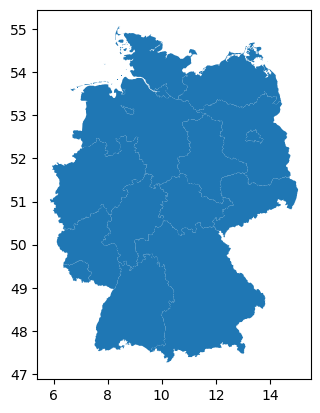

In [69]:
gdf.plot()

## Indexing and selecting

To extract one more more slices of the GeoDataFrame by position you can use the `.iloc` method. <br>
To extract one more more slices of the GeoDataFrame by label you can use the `.loc` method. <br>


In [44]:
gdf.iloc[0:3]

GID_0   NAME_0    GID_1             NAME_1 VARNAME_1  NL_NAME_1     TYPE_1  \
0   DEU  Germany  DEU.1_1  Baden-Württemberg       NaN        NaN       Land   
1   DEU  Germany  DEU.2_1             Bayern   Bavaria        NaN  Freistaat   
2   DEU  Germany  DEU.3_1             Berlin       NaN        NaN       Land   

  ENGTYPE_1 CC_1 HASC_1                                           geometry  
0     State   08  DE.BW  MULTIPOLYGON (((8.70802 47.68958, 8.70766 47.6...  
1       NaN   09  DE.BY  POLYGON ((9.74066 47.55354, 9.74058 47.55311, ...  
2     State   11  DE.BE  POLYGON ((13.17136 52.39776, 13.17135 52.39770...

Extract the data for Berlin from the GeoDataFrame in two differnt ways.

In [70]:
berlin = gdf.iloc[2]
print(berlin)

# same as

berlin = gdf[gdf['NAME_1'] == 'Berlin']
print(berlin)

GID_0                                                      DEU
NAME_0                                                 Germany
GID_1                                                  DEU.3_1
NAME_1                                                  Berlin
VARNAME_1                                                  NaN
NL_NAME_1                                                  NaN
TYPE_1                                                    Land
ENGTYPE_1                                                State
CC_1                                                        11
HASC_1                                                   DE.BE
geometry     POLYGON ((13.17135715 52.3977623, 13.17135334 ...
Name: 2, dtype: object
  GID_0   NAME_0    GID_1  NAME_1 VARNAME_1  NL_NAME_1 TYPE_1 ENGTYPE_1 CC_1  \
2   DEU  Germany  DEU.3_1  Berlin       NaN        NaN   Land     State   11   

  HASC_1                                           geometry  
2  DE.BE  POLYGON ((13.17136 52.39776, 13.17135 52.39770...  

## Plot Berlin


<AxesSubplot: >

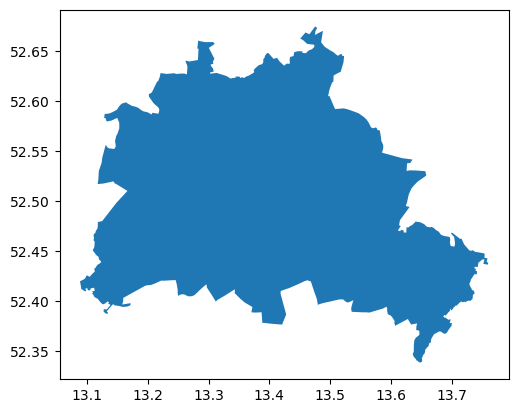

In [71]:
berlin.plot()

## Boundary of selected geometry

Next, we want to display only the polygon line instead its area.


In [72]:
berlin.boundary

2    LINESTRING (13.17136 52.39776, 13.17135 52.397...
dtype: geometry

<AxesSubplot: >

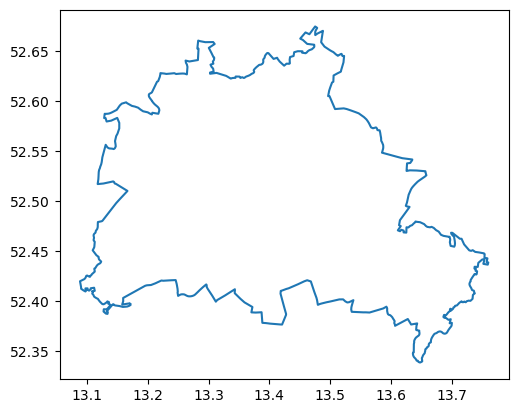

In [73]:
berlin.boundary.plot()

Shapefiles contains the CRS (Coordinate Referenz Sytem) of the shapes which can be displayed using the `crs` method of the GeoPandasFrame.

In [57]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<br>

## Set the CRS

EPSG-Code for Germany

    Code    Koordinatenreferenzsystem   Bemerkung
    25832   ETRS89 / UTM Zone 32N       von 6° O bis 12° O - Fläche: Deutschland (W+M) + Österreich (W) + Schweiz
    25833   ETRS89 / UTM Zone 33N       von 12° O bis 18° O - Fläche: Deutschland (O) + Österreich (M+O) 


In [65]:
gdf_crs = gdf.to_crs('EPSG:25832')

## Area of polygons

With the `area` method we can get the area of each polygon of a shapefile.


In [66]:
gdf_crs.area

0     3.604781e+10
1     7.055266e+10
2     8.931057e+08
3     2.969761e+10
4     3.994890e+08
5     7.358760e+08
6     2.109897e+10
7     2.339139e+10
8     4.764108e+10
9     3.409991e+10
10    1.984731e+10
11    2.570362e+09
12    1.847753e+10
13    2.055396e+10
14    1.561794e+10
15    1.619688e+10
dtype: float64

You can add this information to the GeoDataFrame.

In [67]:
gdf_crs['area'] = gdf_crs.area
gdf_crs

GID_0   NAME_0     GID_1                  NAME_1  \
0    DEU  Germany   DEU.1_1       Baden-Württemberg   
1    DEU  Germany   DEU.2_1                  Bayern   
2    DEU  Germany   DEU.3_1                  Berlin   
3    DEU  Germany   DEU.4_1             Brandenburg   
4    DEU  Germany   DEU.5_1                  Bremen   
5    DEU  Germany   DEU.6_1                 Hamburg   
6    DEU  Germany   DEU.7_1                  Hessen   
7    DEU  Germany   DEU.8_1  Mecklenburg-Vorpommern   
8    DEU  Germany   DEU.9_1           Niedersachsen   
9    DEU  Germany  DEU.10_1     Nordrhein-Westfalen   
10   DEU  Germany  DEU.11_1         Rheinland-Pfalz   
11   DEU  Germany  DEU.12_1                Saarland   
12   DEU  Germany  DEU.14_1                 Sachsen   
13   DEU  Germany  DEU.13_1          Sachsen-Anhalt   
14   DEU  Germany  DEU.15_1      Schleswig-Holstein   
15   DEU  Germany  DEU.16_1               Thüringen   

                     VARNAME_1  NL_NAME_1                TYPE_1 ENGTYPE_1  \
0                          NaN        NaN                  Land     State   
1                      Bavaria        NaN             Freistaat       NaN   
2                          NaN        NaN                  Land     State   
3                          NaN        NaN                  Land     State   
4                          NaN        NaN      Freie Hansestadt     State   
5                          NaN        NaN  Freie und Hansestadt     State   
6                        Hesse        NaN                  Land     State   
7   Mecklenburg-West Pomerania        NaN                  Land     State   
8                 Lower Saxony        NaN                  Land     State   
9       North Rhine-Westphalia        NaN                  Land     State   
10        Rhineland-Palatinate        NaN                  Land     State   
11                         NaN        NaN                  Land     State   
12                      Saxony        NaN             Freistaat     State   
13               Saxony-Anhalt        NaN                  Land     State   
14                         NaN        NaN                  Land     State   
15                   Thuringia        NaN             Freistaat     State   

   CC_1 HASC_1                                           geometry  \
0    08  DE.BW  MULTIPOLYGON (((478089.360 5281840.020, 478061...   
1    09  DE.BY  POLYGON ((555725.045 5266945.270, 555718.896 5...   
2    11  DE.BE  POLYGON ((783756.913 5813469.860, 783757.046 5...   
3    12  DE.BR  MULTIPOLYGON (((723103.990 5791796.568, 723331...   
4    04  DE.HB  MULTIPOLYGON (((480653.548 5877274.417, 480580...   
5    02  DE.HH  MULTIPOLYGON (((580262.564 5930805.760, 580312...   
6    06  DE.HE  MULTIPOLYGON (((476929.924 5496705.648, 476984...   
7    13  DE.MV  MULTIPOLYGON (((663459.997 5989942.724, 663461...   
8    03  DE.NI  MULTIPOLYGON (((351970.465 5943433.244, 351969...   
9    05  DE.NW  POLYGON ((433585.440 5616334.990, 432297.446 5...   
10   07  DE.RP  POLYGON ((330052.390 5491197.570, 330092.178 5...   
11   10  DE.SL  POLYGON ((342796.221 5446981.799, 342567.876 5...   
12   14  DE.SN  POLYGON ((907710.718 5646258.473, 907685.980 5...   
13   15  DE.ST  MULTIPOLYGON (((670485.647 5674869.576, 670568...   
14   01  DE.SH  MULTIPOLYGON (((535017.836 5947515.066, 535022...   
15   16  DE.TH  POLYGON ((692026.051 5586868.076, 691982.932 5...   

            area  
0   3.604781e+10  
1   7.055266e+10  
2   8.931057e+08  
3   2.969761e+10  
4   3.994890e+08  
5   7.358760e+08  
6   2.109897e+10  
7   2.339139e+10  
8   4.764108e+10  
9   3.409991e+10  
10  1.984731e+10  
11  2.570362e+09  
12  1.847753e+10  
13  2.055396e+10  
14  1.561794e+10  
15  1.619688e+10

## Centroid of polygons

For each polygon of the shapefile the centroid can be computed with the `centroid` method of the GeoDataFrame.

We also add this information to the GeoDataFRame.

In [68]:
gdf_crs['centroid'] = gdf_crs.centroid
gdf_crs

GID_0   NAME_0     GID_1                  NAME_1  \
0    DEU  Germany   DEU.1_1       Baden-Württemberg   
1    DEU  Germany   DEU.2_1                  Bayern   
2    DEU  Germany   DEU.3_1                  Berlin   
3    DEU  Germany   DEU.4_1             Brandenburg   
4    DEU  Germany   DEU.5_1                  Bremen   
5    DEU  Germany   DEU.6_1                 Hamburg   
6    DEU  Germany   DEU.7_1                  Hessen   
7    DEU  Germany   DEU.8_1  Mecklenburg-Vorpommern   
8    DEU  Germany   DEU.9_1           Niedersachsen   
9    DEU  Germany  DEU.10_1     Nordrhein-Westfalen   
10   DEU  Germany  DEU.11_1         Rheinland-Pfalz   
11   DEU  Germany  DEU.12_1                Saarland   
12   DEU  Germany  DEU.14_1                 Sachsen   
13   DEU  Germany  DEU.13_1          Sachsen-Anhalt   
14   DEU  Germany  DEU.15_1      Schleswig-Holstein   
15   DEU  Germany  DEU.16_1               Thüringen   

                     VARNAME_1  NL_NAME_1                TYPE_1 ENGTYPE_1  \
0                          NaN        NaN                  Land     State   
1                      Bavaria        NaN             Freistaat       NaN   
2                          NaN        NaN                  Land     State   
3                          NaN        NaN                  Land     State   
4                          NaN        NaN      Freie Hansestadt     State   
5                          NaN        NaN  Freie und Hansestadt     State   
6                        Hesse        NaN                  Land     State   
7   Mecklenburg-West Pomerania        NaN                  Land     State   
8                 Lower Saxony        NaN                  Land     State   
9       North Rhine-Westphalia        NaN                  Land     State   
10        Rhineland-Palatinate        NaN                  Land     State   
11                         NaN        NaN                  Land     State   
12                      Saxony        NaN             Freistaat     State   
13               Saxony-Anhalt        NaN                  Land     State   
14                         NaN        NaN                  Land     State   
15                   Thuringia        NaN             Freistaat     State   

   CC_1 HASC_1                                           geometry  \
0    08  DE.BW  MULTIPOLYGON (((478089.360 5281840.020, 478061...   
1    09  DE.BY  POLYGON ((555725.045 5266945.270, 555718.896 5...   
2    11  DE.BE  POLYGON ((783756.913 5813469.860, 783757.046 5...   
3    12  DE.BR  MULTIPOLYGON (((723103.990 5791796.568, 723331...   
4    04  DE.HB  MULTIPOLYGON (((480653.548 5877274.417, 480580...   
5    02  DE.HH  MULTIPOLYGON (((580262.564 5930805.760, 580312...   
6    06  DE.HE  MULTIPOLYGON (((476929.924 5496705.648, 476984...   
7    13  DE.MV  MULTIPOLYGON (((663459.997 5989942.724, 663461...   
8    03  DE.NI  MULTIPOLYGON (((351970.465 5943433.244, 351969...   
9    05  DE.NW  POLYGON ((433585.440 5616334.990, 432297.446 5...   
10   07  DE.RP  POLYGON ((330052.390 5491197.570, 330092.178 5...   
11   10  DE.SL  POLYGON ((342796.221 5446981.799, 342567.876 5...   
12   14  DE.SN  POLYGON ((907710.718 5646258.473, 907685.980 5...   
13   15  DE.ST  MULTIPOLYGON (((670485.647 5674869.576, 670568...   
14   01  DE.SH  MULTIPOLYGON (((535017.836 5947515.066, 535022...   
15   16  DE.TH  POLYGON ((692026.051 5586868.076, 691982.932 5...   

            area                        centroid  
0   3.604781e+10  POINT (503284.653 5375605.349)  
1   7.055266e+10  POINT (677821.703 5423448.088)  
2   8.931057e+08  POINT (798734.230 5825933.680)  
3   2.969761e+10  POINT (799146.562 5822278.041)  
4   3.994890e+08  POINT (482993.780 5894219.598)  
5   7.358760e+08  POINT (567647.503 5933533.325)  
6   2.109897e+10  POINT (501846.234 5605262.711)  
7   2.339139e+10  POINT (734131.198 5962149.401)  
8   4.764108e+10  POINT (511321.910 5846065.750)  
9   3.409991e+10  POINT (399563.978 5703945.499)  
10  1.984731e+10  POIN

<AxesSubplot: >

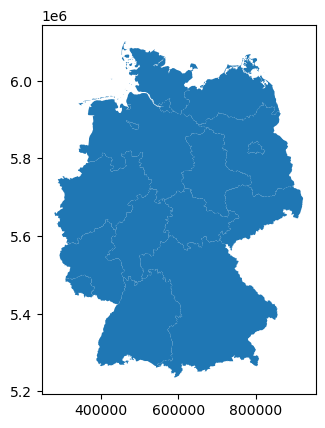

In [64]:
gdf_4326.plot()